In [18]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

epsg:32630


In [19]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = ("EPSG:4326")

# View the first five rows of the GeoDataFrame
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


<AxesSubplot:>

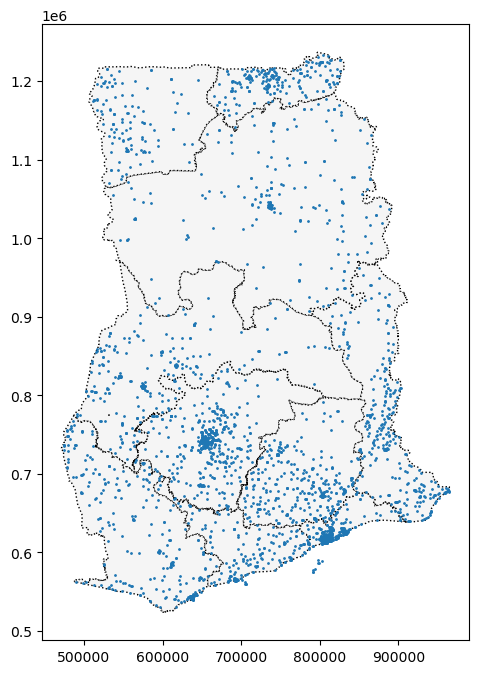

In [20]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [21]:
# The "Latitude" and "Longitude" columns are unchanged
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In [22]:
# Change the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


In [23]:
# Get the x-coordinate of each point
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [24]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: epsg:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


In [25]:
birds_df = pd.read_csv("purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [26]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))

# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds.crs = ('epsg:4326')
birds.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


<AxesSubplot:>

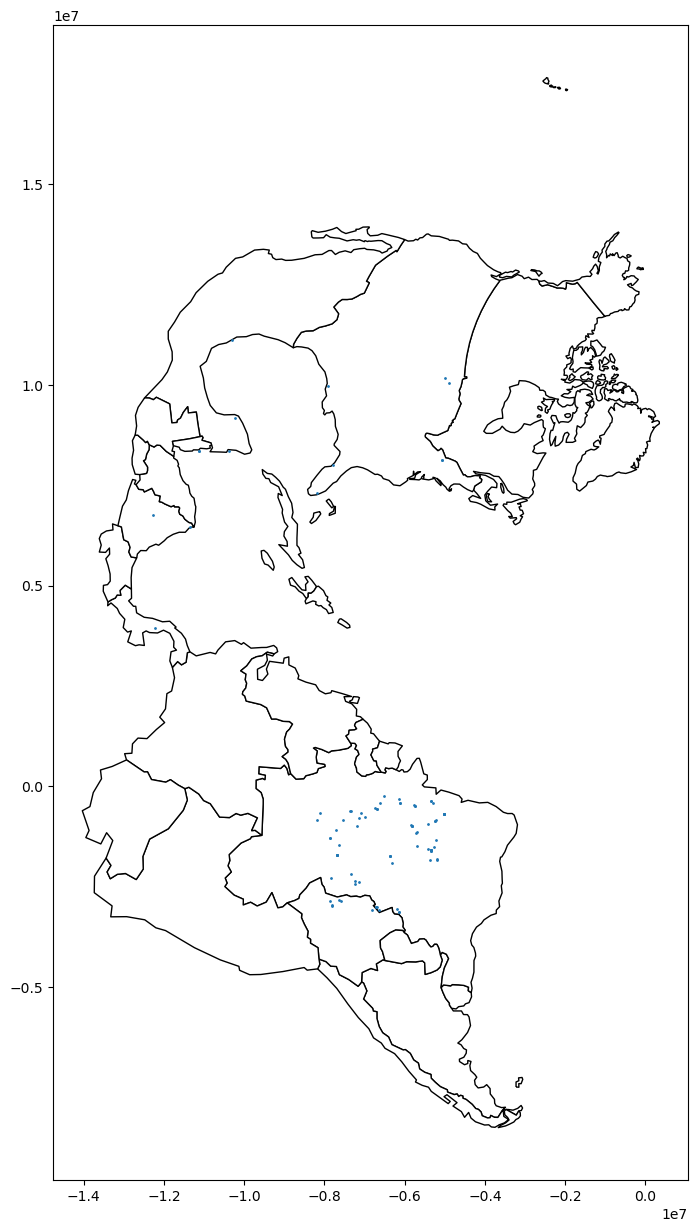

In [28]:
ax = americas.to_crs(epsg=32630).plot(figsize=(15,15), color='white', linestyle='-', edgecolor='black', linewidth=1)
birds.to_crs(epsg=32630).plot(markersize=1, ax=ax)

<AxesSubplot:>

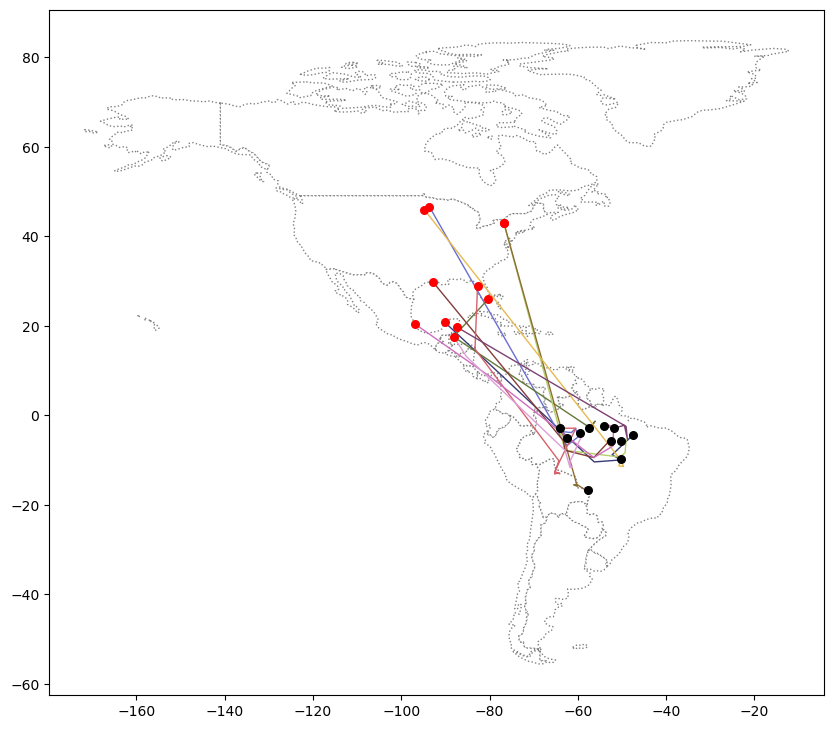

In [29]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = ("epsg:4326")

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = ("epsg:4326")

end_gdf = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_gdf, geometry=end_gdf.geometry)
end_gdf.crs = ("epsg:4326")


ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')

path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
start_gdf.plot(ax=ax, color='red',  markersize=30)
end_gdf.plot(ax=ax, color='black', markersize=30)

<AxesSubplot:>

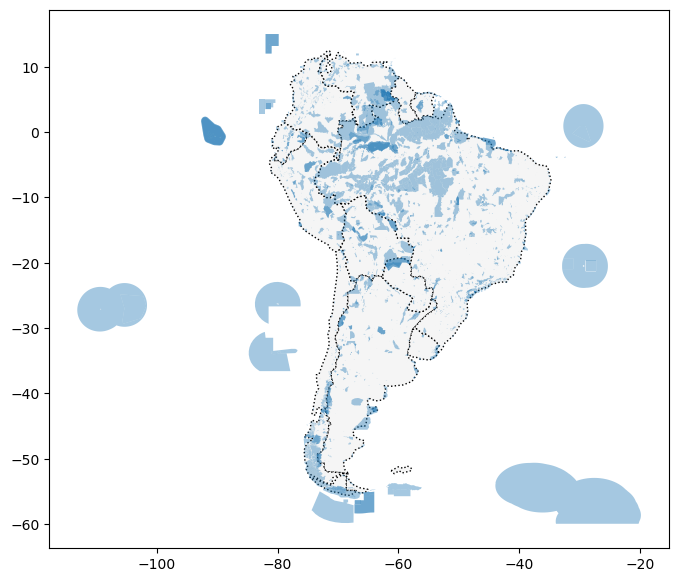

In [30]:
# Path of the shapefile to load
protected_filepath = "SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"

# load it
protected_areas = gpd.read_file(protected_filepath)

# Country boundaries in South America
south_america = americas.loc[americas['continent']=='South America']

# plot protected areas in South America
ax = south_america.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
protected_areas.plot(ax=ax, alpha=0.4)

In [31]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

#Calculate the total area of South America (in square kilometers)
south_america = south_america.to_crs(epsg=3035)
south_america.loc[:, "AREA"] = south_america.geometry.area
totalArea = south_america.geometry.area.sum() / 1000000
print("Total area of South America (in square kilometers) is {}".format(totalArea))

# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

South America has 5396761.9116883585 square kilometers of protected areas.
Total area of South America (in square kilometers) is 17759005.81506123
Approximately 30.39% of South America is protected.


<AxesSubplot:>

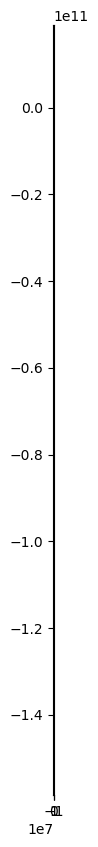

In [32]:
ax = south_america.to_crs(epsg=32630).plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].to_crs(epsg=32630).plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].to_crs(epsg=32630).plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)
